<h1><strong><u>K-Nearest Neighbors Model</u></strong></h1>

<h2><strong><u>Data Preparation</u></strong></h2>

In [1]:
%%capture
%run DataPrep.ipynb

<h2><strong><u>KNN Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................clf__n_neighbors=1; total time=   0.1s
[CV] END ................................clf__n_neighbors=11; total time=   0.0s
[CV] END ................................clf__n_neighbors=81; total time=   0.0s
[CV] END ................................clf__n_neighbors=41; total time=   0.0s
[CV] END ................................clf__n_neighbors=91; total time=   0.0s
[CV] END ................................clf__n_neighbors=31; total time=   0.0s
[CV] END ...............................clf__n_neighbors=101; total time=   0.0s
[CV] END ...............................clf__n_neighbors=111; total time=   0.0s
[CV] END ...............................clf__n_neighbors=121; total time=   0.0s
[CV] END ...............................clf__n_neighbors=131; total time=   0.0s
[CV] END ................................clf__n_neighbors=21; total time=   0.0s
[CV] END ...............................clf__n_neighbors=141; total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


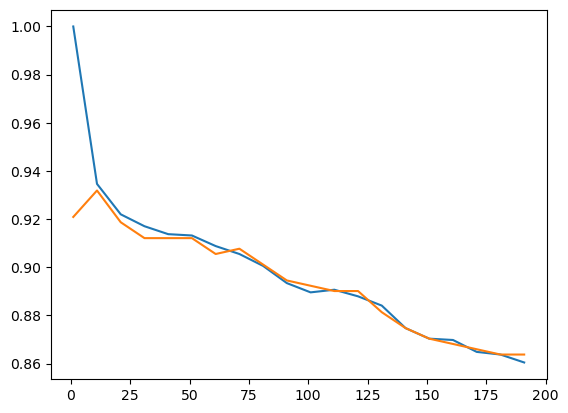

Exception ignored in: <function ResourceTracker.__del__ at 0x105709bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106ce9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106375bc0>
Traceback (most recent call last

In [2]:
pipeline = Pipeline(
    [
        ("clf", KNeighborsClassifier())
    ]
)
neighbors = list(range(1, 201, 10))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__n_neighbors",
                                                   param_range=neighbors,
                                                   verbose=2,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(neighbors, train_scores_mean)
plt.plot(neighbors, validation_scores_mean)

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
Just based off the results from the validation curve, I can see that best that this model can score on the test data is around 93-94%. I don't believe that this model will do any better than the Logistic Regression model. Therefore, there is no reason to continue forward with it.